# Lecture 21 - PLS
## CMSE 381 - Fall 2023
## Oct 30, 2023



In [2]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import seaborn as sns

# ML imports we've used previously
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


# PLS on Hitters Data

# Loading in the data

Ok, here we go, let's play with a baseball data set again. Note this cleanup is all the same as the last lab. 

In [3]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [4]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f

In [5]:
# And here we have the normalized data.
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns = X.columns)
X_normalized.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352,1.058758,0.981166,1.075052
1,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964,-0.944503,0.981166,-0.930187
2,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219,1.058758,-1.019196,1.075052
3,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566,1.058758,-1.019196,1.075052
4,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,-0.031177,2.087225,2.488147,-0.944503,0.981166,-0.930187


# Principal Least Squares (PLS)

The command do do PLS in `Scikit-learn` is  `PLSRegression`. Below is a quick code that runs PLS on our dataset. 

In [6]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold

In [7]:
pls = PLSRegression(n_components=3)
pls.fit(X_normalized,y)
yhat = pls.predict(X_normalized)
mean_squared_error(y,yhat)

105986.3101696595

But like last time, we can also use the `cross_val_score` function to get the CV score easily. 

In [8]:
pls = PLSRegression(n_components=3)
scores = cross_val_score(pls, X_normalized, y, cv=10, scoring='neg_mean_squared_error')
scores.mean()

-120342.57274839829

&#9989; **<font color=red>Do this:</font>**  Like last time, your job is to test a PLS model for an increasing number of components used. I recommend using the `cross_val_score` with `scoring='neg_mean_squared_error'`. What number of components would you use? 

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64


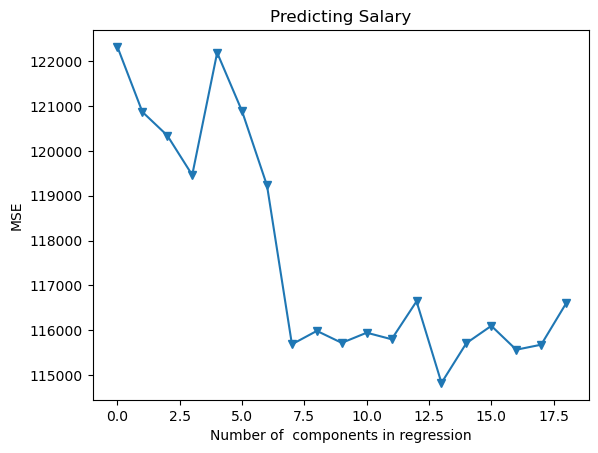

In [11]:
n = len(X_normalized)
mse = []

# Calculate MSE using CV for an increasing number of components, 
# adding one component at a time.
for i in np.arange(1, 20): # i is the number of components to use each time
    pls = PLSRegression(n_components=i)
    scores = cross_val_score(pls, X_normalized, y, cv=10, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of  components in regression')
plt.ylabel('MSE')
plt.title('Predicting Salary')
plt.xlim(xmin=-1);

# Should show actual salary values
print(y.describe()) 

## GridSearchCV


Let's make our lives a little easier! We keep doing $k$-fold CV over lots of parameters, here's a command that we can use to do what we did above in fewer lines. 



First, I'm going to use `Pipeline` to build up a list of things I want to do for my data. Here, I'm going to do the PCR system we used last time (In a little bit you're going to update all this to do PLS for you). 

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
# Create instances of PCA and linear regression
pca = PCA(n_components =2)
linreg = LinearRegression ()

# Buid the pipeline and give each thing in the pipeline a name
pipe = Pipeline ([('pca', pca), ('linreg', linreg)])

# Do the usual fitting with our input data
pipe.fit(X_normalized, y)

# Pull out whatever stuff from the specific step I'm interested in
pipe.named_steps['linreg'].coef_

array([106.36859204,  21.60350456])

&#9989; **<font color=red>Do this:</font>**  How do you get the principal components used in the PCA step? 

*Hint: They're stored in the PCA step as `components_`*

In [14]:
# Get the principal components from the PCA step in the pipeline
principal_components = pipe.named_steps['pca'].components_

# This will give you the principal components (eigenvectors)
print(principal_components)

[[ 0.19829035  0.19586129  0.20436892  0.19833709  0.2351738   0.20892375
   0.28257545  0.33046293  0.33074168  0.31897949  0.33820786  0.34034284
   0.31680294  0.07769718 -0.00084164 -0.00785937 -0.05447087 -0.02572529
  -0.04191031]
 [ 0.38378403  0.37727112  0.23713561  0.37772134  0.3145312   0.2296061
  -0.26240195 -0.19290382 -0.18289883 -0.12629732 -0.17227611 -0.16809208
  -0.19231496  0.15573663  0.16865189  0.20075992 -0.09521324 -0.03667957
  -0.07758356]]


Now what we can do is work with a grid of inputs we want to search. You can be all kinds of fancy and change more than one input, but we're only ever doing one for this class. 

So in my case, what I want to do is mess around with the number of components passed into PCA by setting this from 1 to 19.  Notice that because of my pipeline step, the key for the entry in the dictionary for `param_grid` has `pca` first since that's the part of the pipeline I want, then two underscores, then the name of the input for `pca` that I'm messing with. 

In [20]:
# Here's me creating my parameter grid
param_grid = {'pca__n_components': range (1, 20)}

Now I get to pass this into the `GridSearchCV` command, which does exacly what you did above. It takes everything in the defined pipeline, does 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# This actually does the fit
gridPCA = GridSearchCV(pipe , param_grid, cv=kf_10 ,scoring='neg_mean_squared_error')
gridPCA.fit(X_normalized, y)

NameError: name 'kf_10' is not defined

Now I want to find out what it figured out. 

Here's how I can find the mean test score over all the entries in the parameter grid. The negative is because internally, sklearn uses negative MSE. Note that there are entries corresponding to $[1,\cdots,19]$ 

In [23]:
-gridPCA.cv_results_['mean_test_score']

NameError: name 'gridPCA' is not defined

And now I can plot to see what's up. 

In [24]:
n_comp = param_grid['pca__n_components']

plt.plot(n_comp , -gridPCA.cv_results_['mean_test_score'], label = 'PCR')
plt.legend()
plt.ylabel('Cross -validated MSE')
plt.xlabel('# principal components')
plt.xticks(n_comp [::2])
plt.ylim ([100000 ,140000]);

NameError: name 'gridPCA' is not defined

&#9989; **<font color=red>Do this:</font>**  Do the same thing but for the PLS pipeline discussed above. 
- I recommend changing my named `gridPCA` to something like `gridPLS`. 
- You actually don't need the `Pipeline` here since you're only doing `PLSRegression` so the code should actually be simpler. 
- Draw the resulting plot with the PCR and PLS drawn on top of each other.


In [25]:
# Your code here 



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.